In [26]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("../bd/ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Scaling vs. Normalization

Text(0.5, 1.0, 'Scaled data')

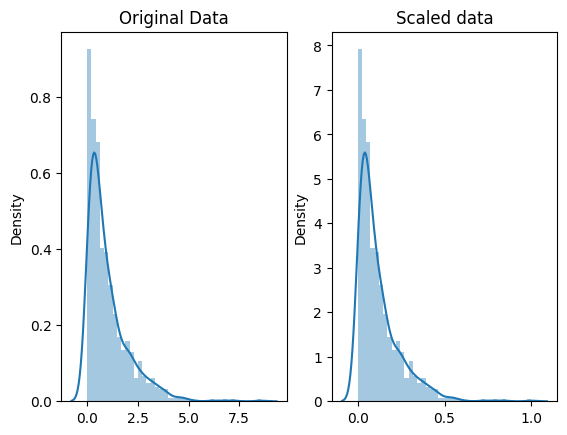

In [28]:
np.random.seed(0)
# Экспоненциал тархалтаас санамсаргүй байдлаар авсан 1000 өгөгдлийн цэгийг үүсгэнэ
original_data = np.random.exponential(size = 1000)
# mix-max өгөгдлийг 0-ээс 1-ийн хооронд томруулна
scaled_data = minmax_scaling(original_data, columns = [0])

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")


Normalization

Text(0.5, 1.0, 'Normalized data')

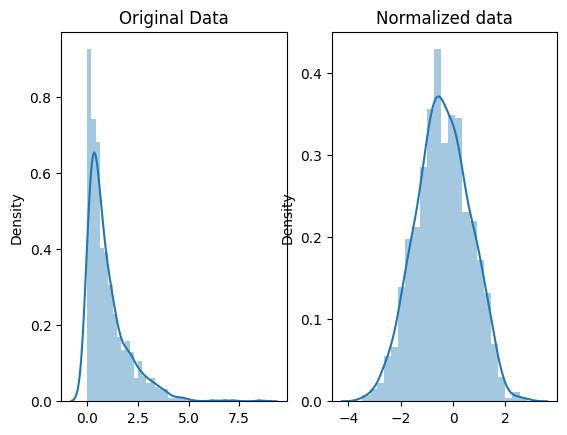

In [29]:
# экспоненциал өгөгдлийг boxcox ашиглан хэвийн болгох
normalized_data = stats.boxcox(original_data)

fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Practice scaling

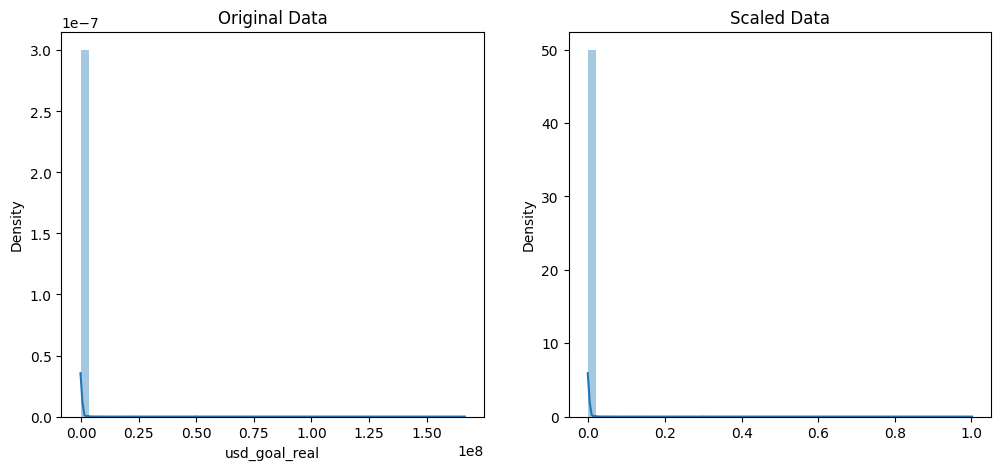

In [31]:
usd_goal = df['usd_goal_real']

# Convert the Pandas Series to a NumPy array
usd_goal_array = usd_goal.values.reshape(-1, 1)

# Scale the data using min-max scaling
scaled_data = minmax_scaling(usd_goal_array, columns=[0])

# Create subplots for side-by-side comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original data
sns.distplot(usd_goal, ax=ax[0])
ax[0].set_title("Original Data")

# Plot the scaled data
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled Data")

plt.show()

Text(0.5, 1.0, 'Normalized data')

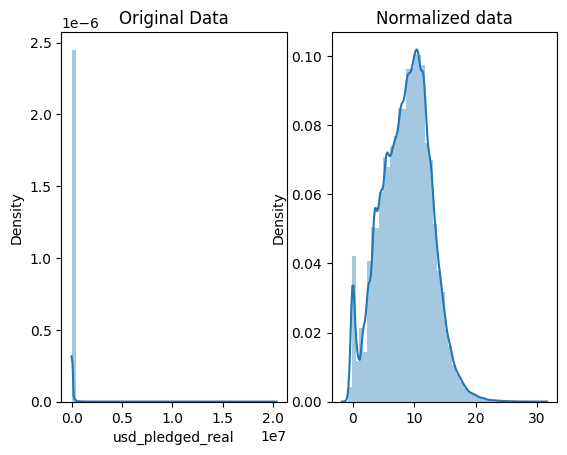

In [33]:
# бүх эерэг амлалтуудын индексийг авах (Box-Cox зөвхөн эерэг утгыг авдаг)
index_of_positive_pledges = df.usd_pledged_real > 0
# зөвхөн эерэг амлалт авах (индексийг ашиглан)
positive_pledges = df.usd_pledged_real.loc[index_of_positive_pledges]
# normalize the pledges (w/ Box-Cox)

normalized_pledges = stats.boxcox(positive_pledges)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")